In [2]:
import requests
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

def get_fakestore_data():
    url = 'https://fakestoreapi.com/products'
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error fetching data: {response.status_code}")
        return None

def generate_fake_sales_data(products, days=360):
    sales_data = []
    end_date = datetime.now()
    start_date = end_date - timedelta(days=days)
    
    for product in products:
        # Generate daily sales for each product
        for day in range(days):
            date = start_date + timedelta(days=day)
            sales = int(np.random.normal(50, 20))  # Random sales with mean 50 and std dev 20
            price = product['price'] * (1 + np.random.normal(0, 0.1))  # Random price fluctuation
            
            sales_data.append({
                'date': date.strftime('%Y-%m-%d'),
                'product_id': product['id'],
                'product_name': product['title'],
                'category': product['category'],
                'sales': max(0, sales),  # Ensure non-negative sales
                'price': round(price, 2)
            })
    
    return sales_data

def analyze_data(df):
    print(f"Total records: {len(df)}")
    print(f"\nProduct categories:")
    print(df['category'].value_counts())
    
    print(f"\nTop 5 products by total sales:")
    top_products = df.groupby('product_name')['sales'].sum().sort_values(ascending=False).head()
    print(top_products)
    
    print(f"\nAverage daily sales by category:")
    avg_sales = df.groupby('category')['sales'].mean().sort_values(ascending=False)
    print(avg_sales)

products = get_fakestore_data()

if products:
    
    sales_data = generate_fake_sales_data(products)
    
    # Create DataFrame
    df = pd.DataFrame(sales_data)
    
    # Analyze data
    analyze_data(df)
    
    # Save to CSV
    df.to_csv('fakestore_sales_data.csv', index=False)
    print(f"\nData saved to fakestore_sales_data.csv")
else:
    print("Failed to fetch product data.")

Total records: 7200

Product categories:
category
women's clothing    2160
electronics         2160
jewelery            1440
men's clothing      1440
Name: count, dtype: int64

Top 5 products by total sales:
product_name
WD 2TB Elements Portable External Hard Drive - USB 3.0                          18744
Rain Jacket Women Windbreaker Striped Climbing Raincoats                        18650
John Hardy Women's Legends Naga Gold & Silver Dragon Station Chain Bracelet     18497
Silicon Power 256GB SSD 3D NAND A55 SLC Cache Performance Boost SATA III 2.5    18163
Mens Casual Slim Fit                                                            18143
Name: sales, dtype: int64

Average daily sales by category:
category
electronics         49.786574
jewelery            49.387500
men's clothing      49.271528
women's clothing    49.151389
Name: sales, dtype: float64

Data saved to fakestore_sales_data.csv


In [3]:
sales_data = pd.read_csv('fakestore_sales_data.csv')

In [4]:
print(sales_data.head(10))
print(sales_data.tail(10))

         date  product_id                                       product_name  \
0  2023-09-23           1  Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...   
1  2023-09-24           1  Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...   
2  2023-09-25           1  Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...   
3  2023-09-26           1  Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...   
4  2023-09-27           1  Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...   
5  2023-09-28           1  Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...   
6  2023-09-29           1  Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...   
7  2023-09-30           1  Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...   
8  2023-10-01           1  Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...   
9  2023-10-02           1  Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...   

         category  sales   price  
0  men's clothing     22  105.51  
1  men's clothing     69   98.09  
2  men's cloth

In [6]:
sales_data['category'].value_counts()

category
women's clothing    2160
electronics         2160
jewelery            1440
men's clothing      1440
Name: count, dtype: int64

In [7]:
sales_data.shape

(7200, 6)

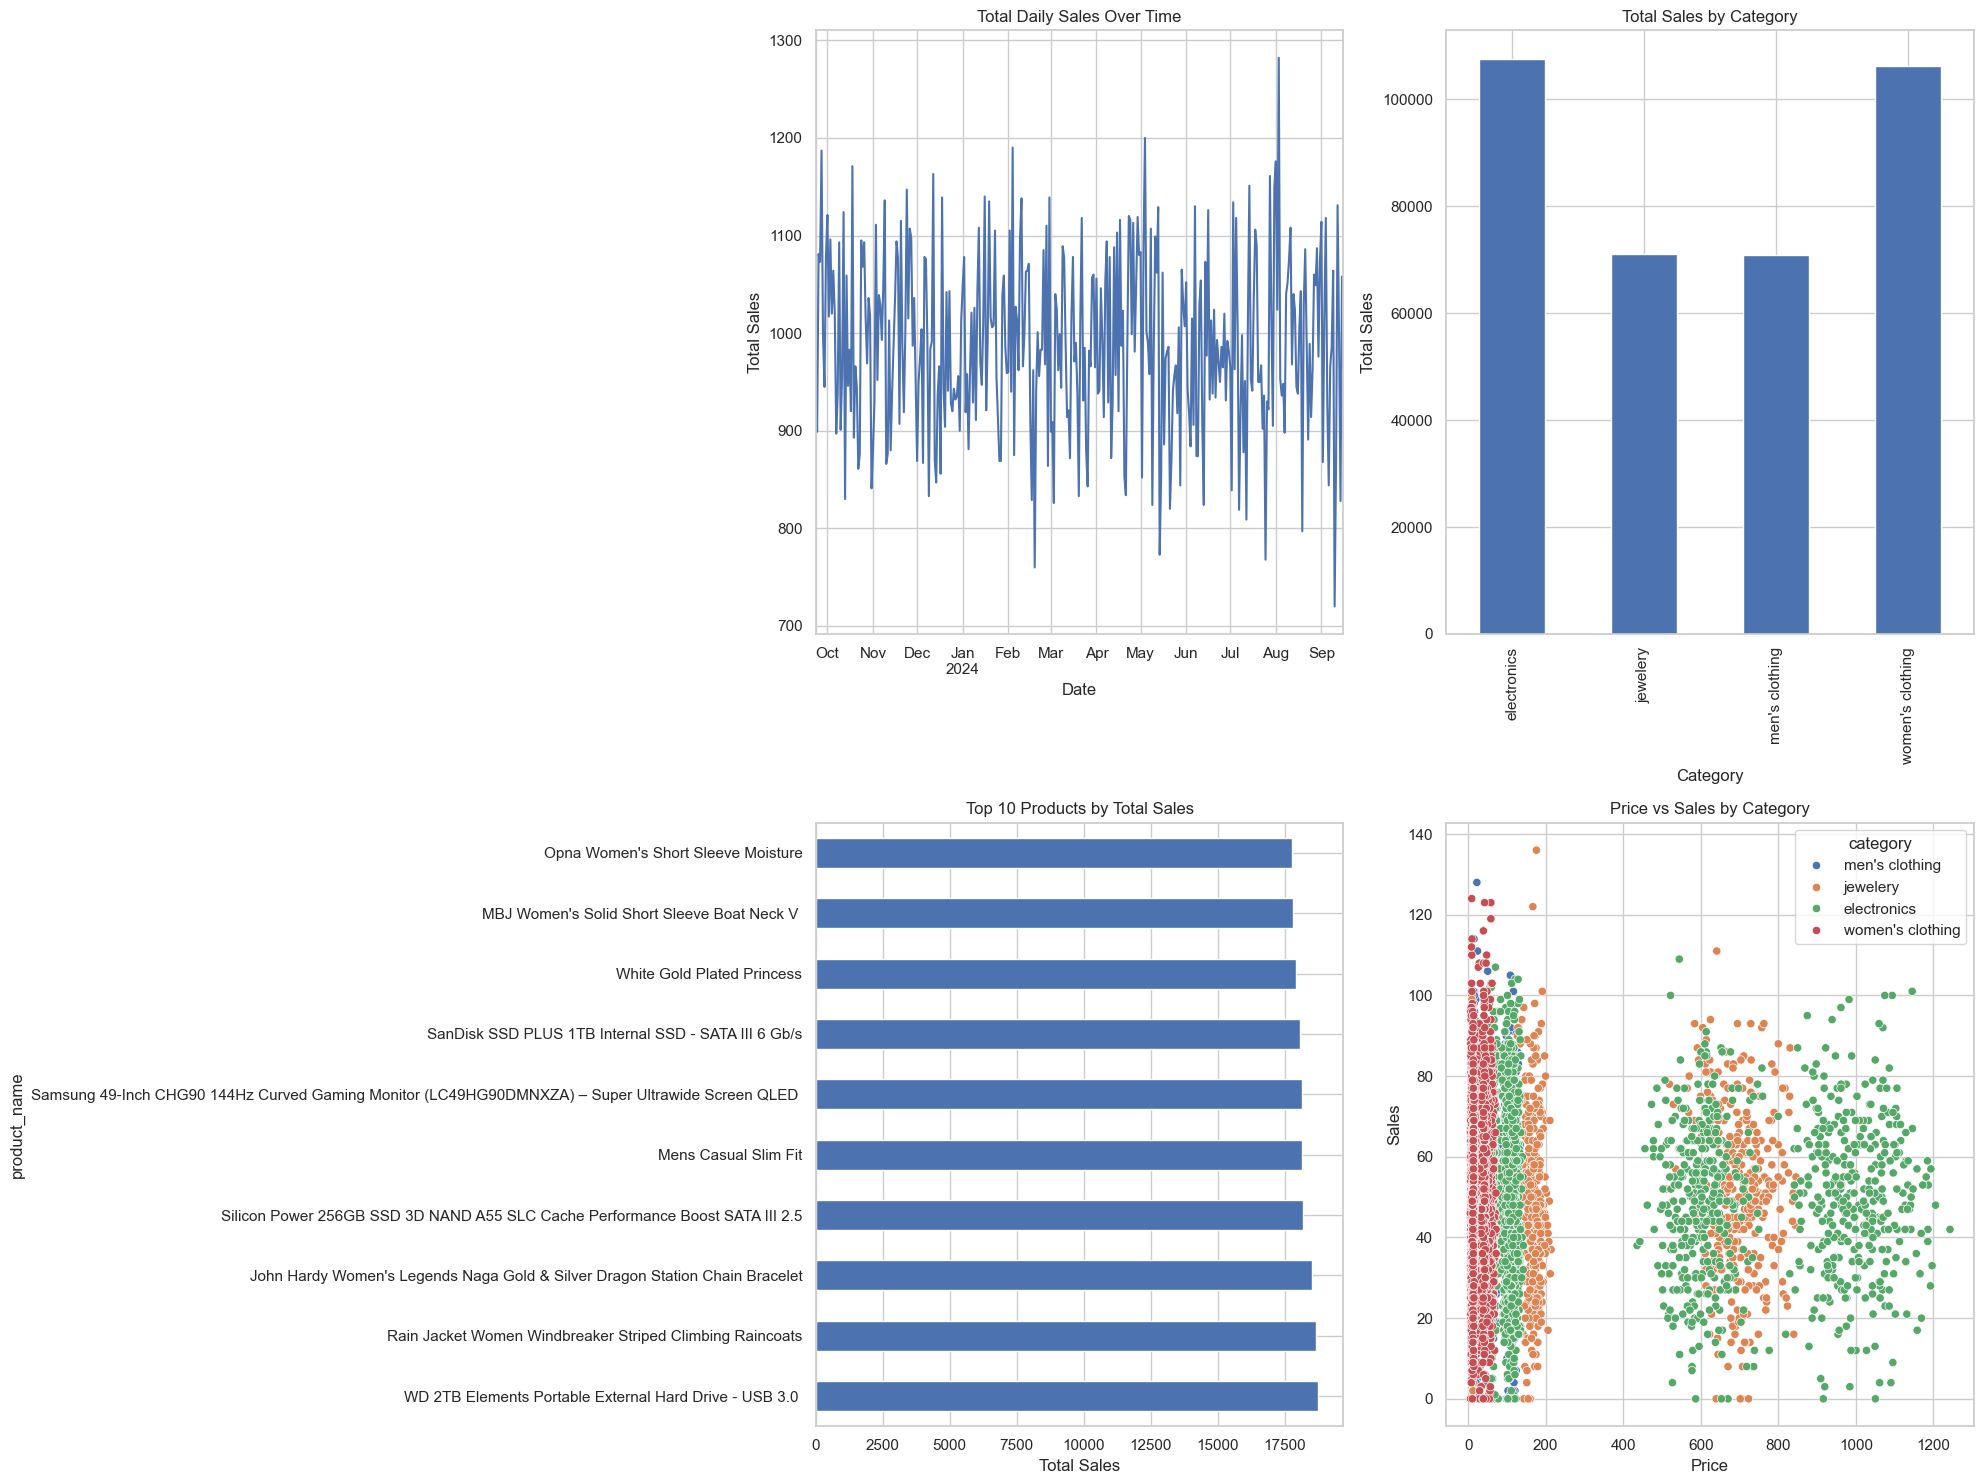

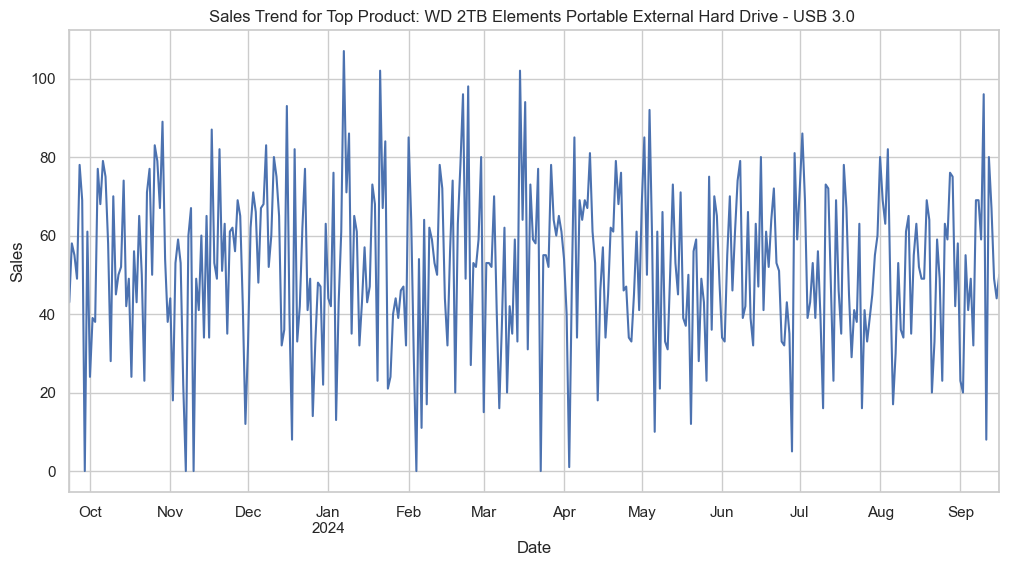

In [26]:
import matplotlib.pyplot as plt

# Converting date to datetime
sales_data['date'] = pd.to_datetime(sales_data['date'])

# Setting up the plot style
sns.set_style('whitegrid')
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# 1. Total sales over time
sales_data.groupby('date')['sales'].sum().plot(ax=axes[0, 0])
axes[0, 0].set_title('Total Daily Sales Over Time')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Total Sales')

# 2. Sales by category
sales_data.groupby('category')['sales'].sum().plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Total Sales by Category')
axes[0, 1].set_xlabel('Category')
axes[0, 1].set_ylabel('Total Sales')

# 3. Top 10 products by sales
top_10 = sales_data.groupby('product_name')['sales'].sum().sort_values(ascending=False).head(10)
top_10.plot(kind='barh', ax=axes[1, 0])
axes[1, 0].set_title('Top 10 Products by Total Sales')
axes[1, 0].set_xlabel('Total Sales')

# 4. Price vs Sales scatter plot
sns.scatterplot(data=sales_data, x='price', y='sales', hue='category', ax=axes[1, 1])
axes[1, 1].set_title('Price vs Sales by Category')
axes[1, 1].set_xlabel('Price')
axes[1, 1].set_ylabel('Sales')

plt.tight_layout()
plt.savefig('sales_analysis.png')
plt.show()

# Additional analysis: Sales trend for top product
top_product = sales_data.groupby('product_name')['sales'].sum().idxmax()
top_product_sales = sales_data[sales_data['product_name'] == top_product].set_index('date')['sales']

plt.figure(figsize=(12, 6))
top_product_sales.plot()
plt.title(f'Sales Trend for Top Product: {top_product}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.savefig('top_product_trend.png')
plt.show()

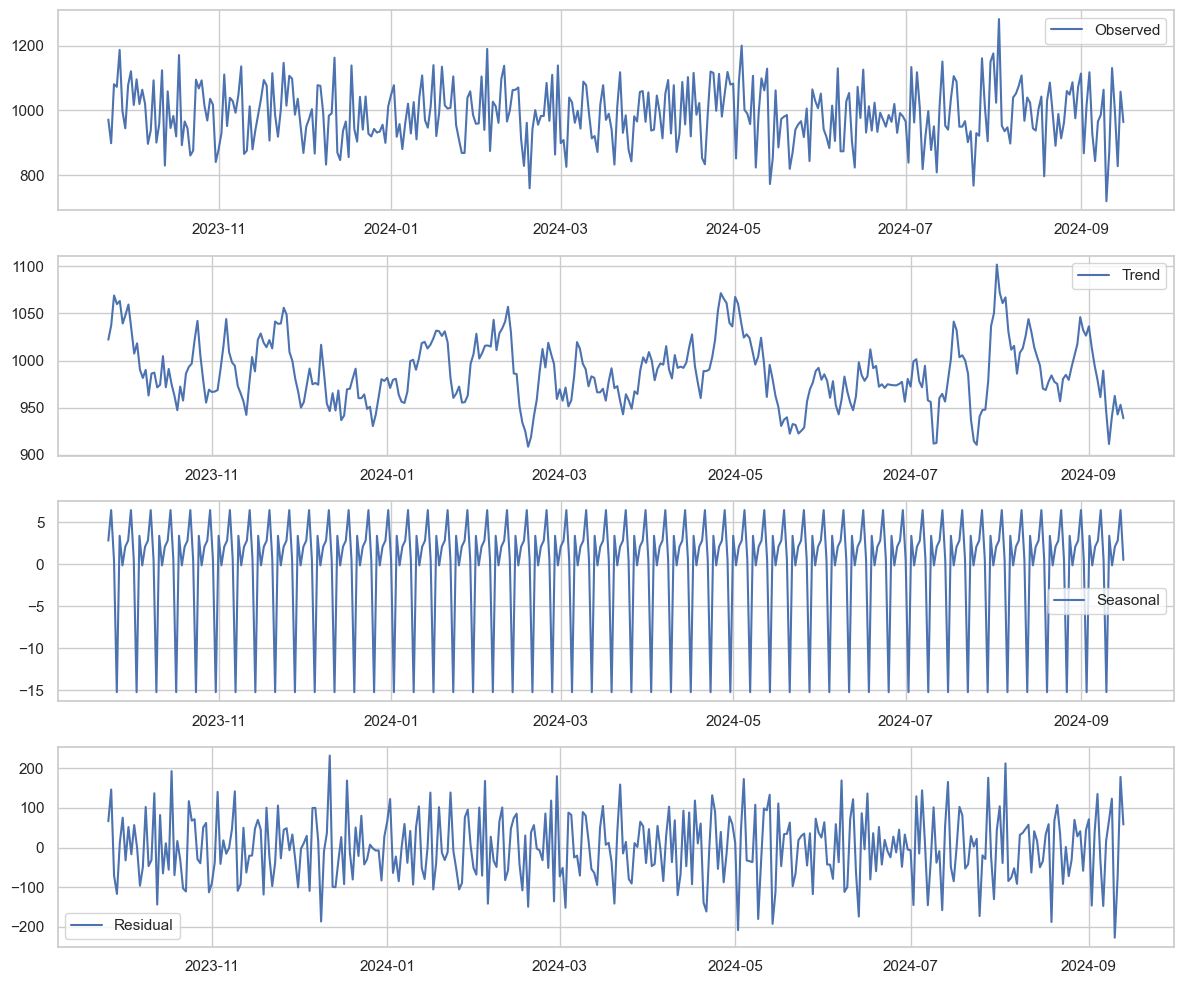

In [27]:
# Time Series Decomposition

from statsmodels.tsa.seasonal import seasonal_decompose

# Aggregating sales by date
daily_sales = sales_data.groupby('date')['sales'].sum().reset_index()
daily_sales.set_index('date', inplace=True)

# Performing time series decomposition
decomposition = seasonal_decompose(daily_sales['sales'], model='additive', period=7)  # Assuming weekly seasonality

# Plotting the decomposition
plt.figure(figsize=(12, 10))
plt.subplot(411)
plt.plot(daily_sales['sales'], label='Observed')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('time_series_decomposition.png')
plt.show()

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


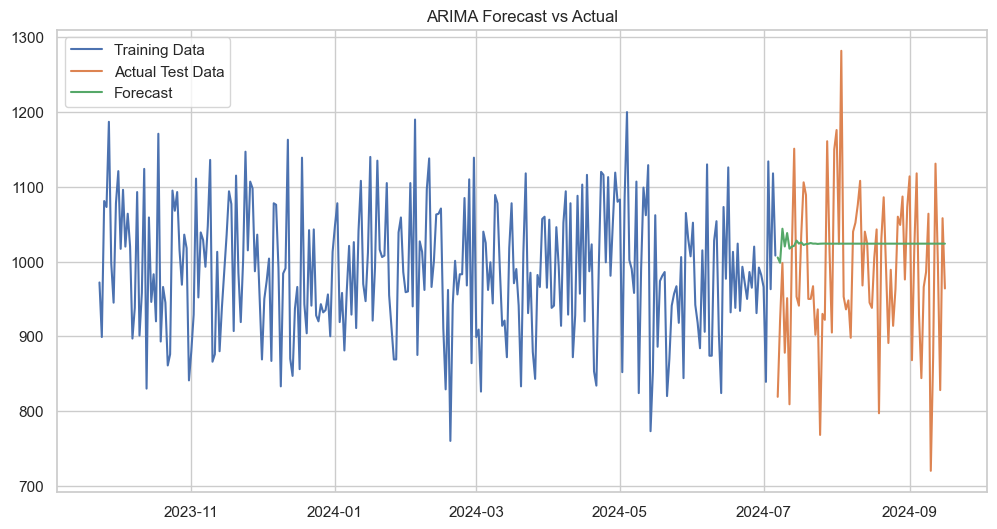

Root Mean Squared Error: 107.99011586400421


In [29]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Preparing data for ARIMA
data = daily_sales['sales']
train = data[:int(0.8*(len(data)))]
test = data[int(0.8*(len(data))):]

# Fitting ARIMA model
model = ARIMA(train, order=(5,1,0))
fitted = model.fit()

# Forecast
forecast = fitted.forecast(steps=len(test))

# Plotting the results
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Test Data')
plt.plot(test.index, forecast, label='Forecast')
plt.title('ARIMA Forecast vs Actual')
plt.legend()
plt.savefig('arima_forecast.png')
plt.show()

rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'Root Mean Squared Error: {rmse}')

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


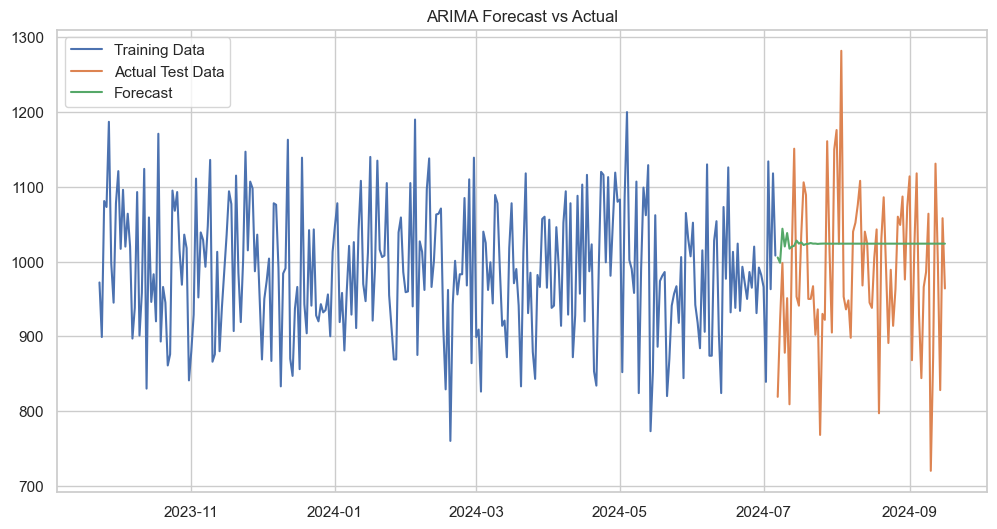

Root Mean Squared Error: 107.99011586400421
Mean Absolute Error: 86.24898314814823
Mean Absolute Percentage Error: 0.09221815960075064


In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Preparing data for ARIMA
data = daily_sales['sales']
train, test = train_test_split(data, test_size=0.2, shuffle=False)

# Fitting ARIMA model
model = ARIMA(train, order=(5,1,0))
fitted = model.fit()

# Forecast
forecast = fitted.forecast(steps=len(test))


plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Test Data')
plt.plot(test.index, forecast, label='Forecast')
plt.title('ARIMA Forecast vs Actual')
plt.legend()
plt.savefig('arima_forecast.png')
plt.show()

# Calculating metrics
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
mape = np.mean(np.abs((test - forecast) / test))

print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error: {mape}')

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWar

Best parameters: (1, 1, 3)
Best RMSE: 102.10099311295814


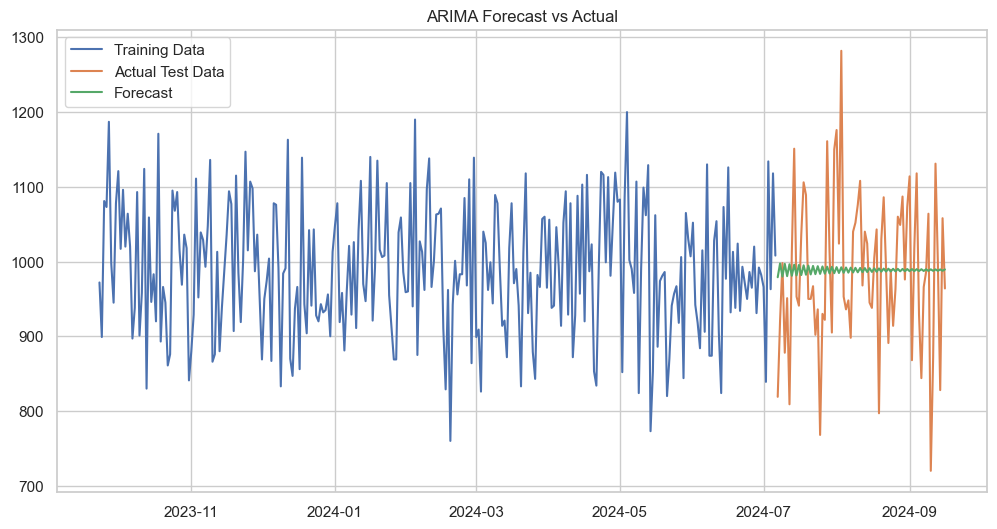

Root Mean Squared Error (tuned): 102.10099311295814
Mean Absolute Error (tuned): 81.40104880455829
Mean Absolute Percentage Error (tuned): 0.0845166940153092


In [31]:
p_values = [1, 2, 3, 4, 5]
d_values = [1, 2]
q_values = [1, 2, 3, 4]

best_params = None
best_score = float('inf')

for p in p_values:
    for d in d_values:
        for q in q_values:
            model = ARIMA(train, order=(p, d, q))
            model_fit = model.fit()
            forecast = model_fit.forecast(steps=len(test))
            rmse = np.sqrt(mean_squared_error(test, forecast))
            if rmse < best_score:
                best_score = rmse
                best_params = (p, d, q)

print(f'Best parameters: {best_params}')
print(f'Best RMSE: {best_score}')

# Fitting ARIMA model with best parameters
model = ARIMA(train, order=best_params)
fitted = model.fit()

# Forecast
forecast = fitted.forecast(steps=len(test))


plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Test Data')
plt.plot(test.index, forecast, label='Forecast')
plt.title('ARIMA Forecast vs Actual')
plt.legend()
plt.savefig('arima_forecast_tuned.png')
plt.show()


rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
mape = np.mean(np.abs((test - forecast) / test))

print(f'Root Mean Squared Error (tuned): {rmse}')
print(f'Mean Absolute Error (tuned): {mae}')
print(f'Mean Absolute Percentage Error (tuned): {mape}')

In [32]:
sales_data.columns

Index(['date', 'product_id', 'product_name', 'category', 'sales', 'price'], dtype='object')

In [34]:
sales_data['product_name'].value_counts()

product_name
Fjallraven - Foldsack No. 1 Backpack, Fits 15 Laptops                                                360
Mens Casual Premium Slim Fit T-Shirts                                                                360
Mens Cotton Jacket                                                                                   360
Mens Casual Slim Fit                                                                                 360
John Hardy Women's Legends Naga Gold & Silver Dragon Station Chain Bracelet                          360
Solid Gold Petite Micropave                                                                          360
White Gold Plated Princess                                                                           360
Pierced Owl Rose Gold Plated Stainless Steel Double                                                  360
WD 2TB Elements Portable External Hard Drive - USB 3.0                                               360
SanDisk SSD PLUS 1TB Internal SSD - SATA I

In [35]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Overall Sales Aggregation
overall_sales = sales_data.groupby('date').agg({'sales': 'sum'})
overall_sales.index = pd.to_datetime(overall_sales.index)

# Fitting ETS Model for Overall Sales with Weekly Seasonality
ets_overall = ExponentialSmoothing(overall_sales['sales'], trend='add', seasonal='add', seasonal_periods=7).fit()
overall_forecast = ets_overall.forecast(steps=30)  # Forecasting the next 30 days


C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [36]:
category_sales = sales_data.groupby(['date', 'category']).agg({'sales': 'sum'}).reset_index()
category_sales['date'] = pd.to_datetime(category_sales['date'])

# Looping through each category
category_forecasts = {}
for category in category_sales['category'].unique():
    cat_sales = category_sales[category_sales['category'] == category].set_index('date')
    ets_category = ExponentialSmoothing(cat_sales['sales'], trend='add', seasonal='add', seasonal_periods=30).fit()
    category_forecasts[category] = ets_category.forecast(steps=30)


C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [37]:
product_sales = sales_data.groupby(['date', 'product_id']).agg({'sales': 'sum'}).reset_index()
product_sales['date'] = pd.to_datetime(product_sales['date'])

# Looping through each product
product_forecasts = {}
for product_id in product_sales['product_id'].unique():
    prod_sales = product_sales[product_sales['product_id'] == product_id].set_index('date')
    ets_product = ExponentialSmoothing(prod_sales['sales'], trend='add', seasonal='add', seasonal_periods=7).fit()
    product_forecasts[product_id] = ets_product.forecast(steps=30)


C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWar

In [38]:
print(overall_forecast)

2024-09-17     950.874578
2024-09-18     996.990888
2024-09-19     989.558495
2024-09-20     975.404266
2024-09-21     992.617737
2024-09-22    1002.536515
2024-09-23     964.488535
2024-09-24     949.720399
2024-09-25     995.836709
2024-09-26     988.404315
2024-09-27     974.250087
2024-09-28     991.463558
2024-09-29    1001.382336
2024-09-30     963.334356
2024-10-01     948.566220
2024-10-02     994.682530
2024-10-03     987.250136
2024-10-04     973.095908
2024-10-05     990.309379
2024-10-06    1000.228157
2024-10-07     962.180177
2024-10-08     947.412041
2024-10-09     993.528351
2024-10-10     986.095957
2024-10-11     971.941729
2024-10-12     989.155200
2024-10-13     999.073978
2024-10-14     961.025998
2024-10-15     946.257862
2024-10-16     992.374172
Freq: D, dtype: float64


In [39]:
category_forecasts

{'electronics': 2024-09-17    300.232516
 2024-09-18    306.436471
 2024-09-19    319.572623
 2024-09-20    298.486146
 2024-09-21    318.948230
 2024-09-22    285.800397
 2024-09-23    276.772579
 2024-09-24    305.127206
 2024-09-25    303.201511
 2024-09-26    322.609659
 2024-09-27    303.665530
 2024-09-28    316.589470
 2024-09-29    314.333040
 2024-09-30    304.301764
 2024-10-01    306.458146
 2024-10-02    287.462534
 2024-10-03    323.088979
 2024-10-04    283.429124
 2024-10-05    302.999449
 2024-10-06    282.940807
 2024-10-07    300.191375
 2024-10-08    305.363889
 2024-10-09    296.395226
 2024-10-10    292.982486
 2024-10-11    305.077361
 2024-10-12    313.254144
 2024-10-13    303.668885
 2024-10-14    304.526426
 2024-10-15    287.943512
 2024-10-16    302.898726
 Freq: D, dtype: float64,
 'jewelery': 2024-09-17    188.516125
 2024-09-18    193.675854
 2024-09-19    177.569704
 2024-09-20    209.870371
 2024-09-21    208.523112
 2024-09-22    187.498380
 2024-09-23

# Evaluating the model

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Root Mean Squared Error (RMSE): 104.73767066884147
Mean Absolute Error (MAE): 83.01642468083469
Mean Absolute Percentage Error (MAPE): 8.54130816221917%


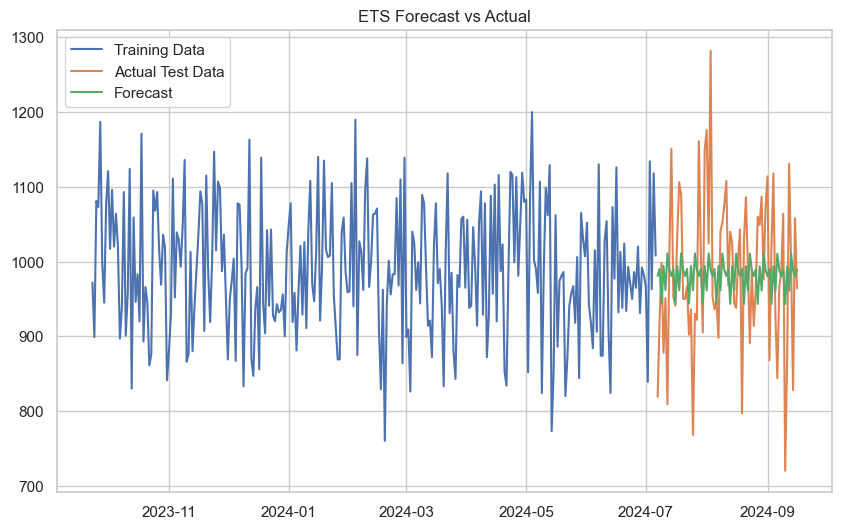

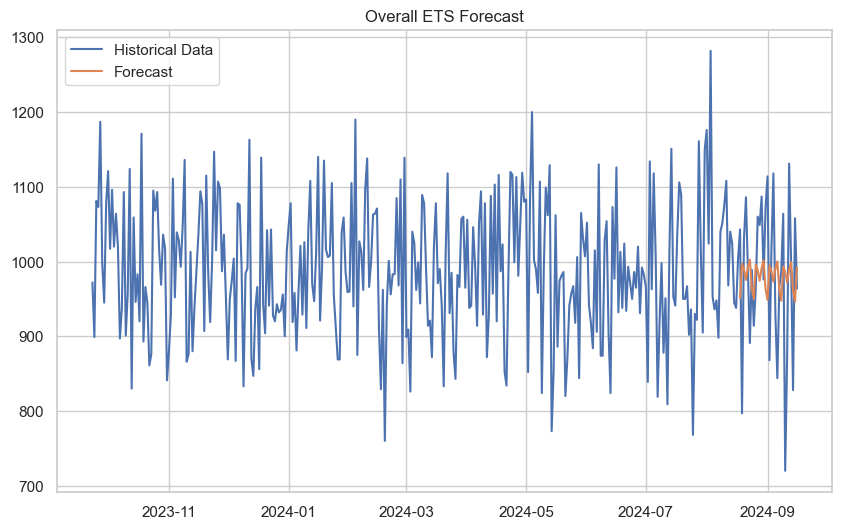

In [60]:
# Overall sales

train_size = int(len(overall_sales) * 0.8)
train_data, test_data = overall_sales[0:train_size], overall_sales[train_size:len(overall_sales)]

# Evaluating model performance
ets_model = ExponentialSmoothing(train_data['sales'], trend='add', seasonal='add', seasonal_periods=7).fit()
forecast = ets_model.forecast(steps=len(test_data))

rmse = np.sqrt(mean_squared_error(test_data['sales'], forecast))
mae = mean_absolute_error(test_data['sales'], forecast)
mape = np.mean(np.abs((test_data['sales'] - forecast) / test_data['sales'])) * 100

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')


plt.figure(figsize=(10,6))
plt.plot(train_data.index, train_data['sales'], label='Training Data')
plt.plot(test_data.index, test_data['sales'], label='Actual Test Data')
plt.plot(test_data.index, forecast, label='Forecast')
plt.title('ETS Forecast vs Actual')
plt.legend()
plt.show()

# Visualizing overall forecast
plt.figure(figsize=(10,6))
plt.plot(overall_sales.index, overall_sales['sales'], label='Historical Data')
plt.plot(overall_sales.index[-30:], overall_forecast, label='Forecast')
plt.title('Overall ETS Forecast')
plt.legend()
plt.savefig('ets_forecast_vs_actual.png', bbox_inches='tight', dpi=300)
plt.show()

<Figure size 640x480 with 0 Axes>

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


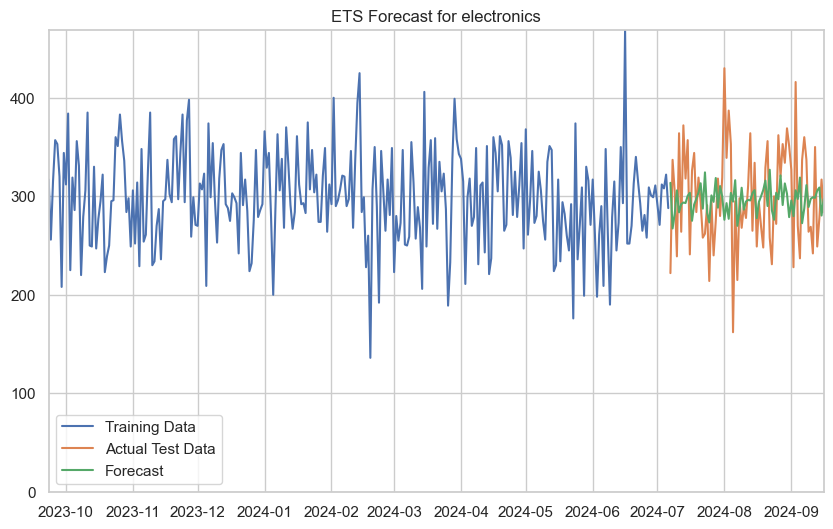

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


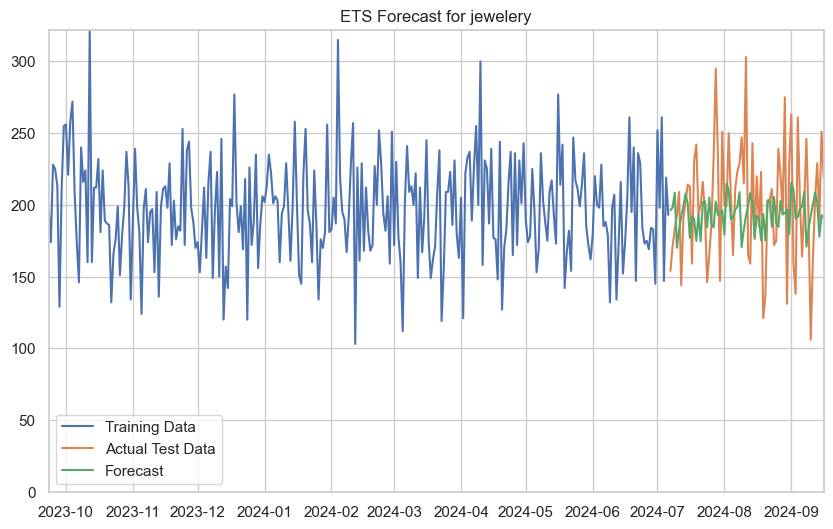

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


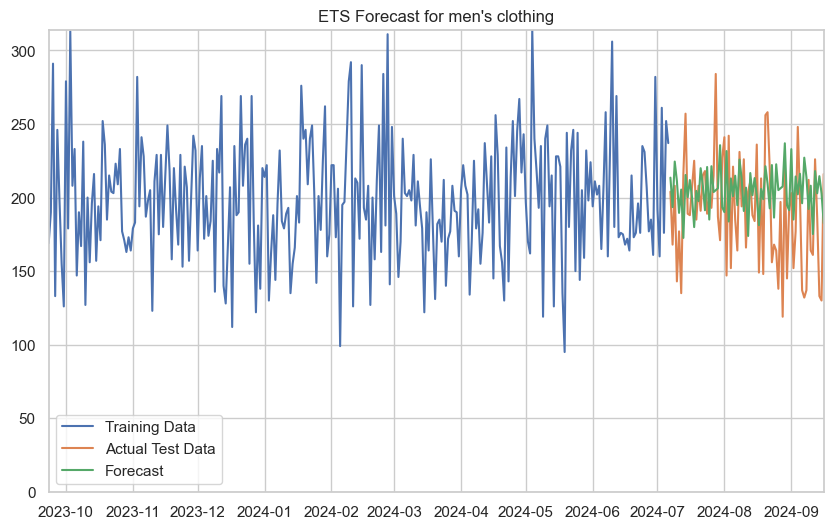

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


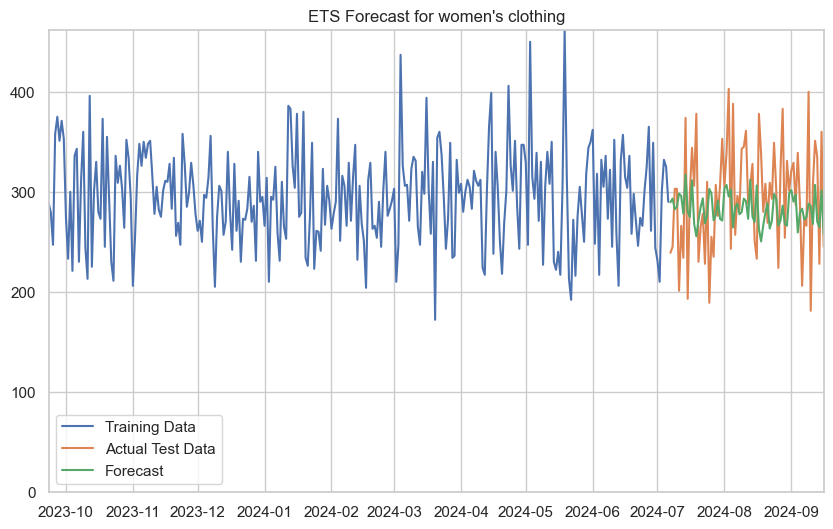

Category: electronics
RMSE: 54.61737299202404
MAE: 45.74422143125149
MAPE: 15.802796858993759%

Category: jewelery
RMSE: 42.13465752797826
MAE: 34.23753461938218
MAPE: 17.766328681458813%

Category: men's clothing
RMSE: 42.51913993273041
MAE: 35.47209286475301
MAPE: 20.76382153378522%

Category: women's clothing
RMSE: 56.03827736294047
MAE: 45.43357049418392
MAPE: 15.841126678367859%



In [59]:
# Category Sales
# dictionary to store performance metrics
category_metrics = {}

# Looping through each category
for category in category_sales['category'].unique():
    cat_sales = category_sales[category_sales['category'] == category].set_index('date')
    
    train_size = int(len(cat_sales) * 0.8)
    train_data, test_data = cat_sales[0:train_size], cat_sales[train_size:len(cat_sales)]
    
    # Fitting ETS model
    ets_category = ExponentialSmoothing(train_data['sales'], trend='add', seasonal='add', seasonal_periods=30).fit()
    
    # Generating forecast
    forecast = ets_category.forecast(steps=len(test_data))
    
    rmse = np.sqrt(mean_squared_error(test_data['sales'], forecast))
    mae = mean_absolute_error(test_data['sales'], forecast)
    mape = np.mean(np.abs((test_data['sales'] - forecast) / test_data['sales'])) * 100
    
    category_metrics[category] = {'RMSE': rmse, 'MAE': mae, 'MAPE': mape}
    
    plt.figure(figsize=(10,6))
    plt.plot(train_data.index, train_data['sales'], label='Training Data')
    plt.plot(test_data.index, test_data['sales'], label='Actual Test Data')
    plt.plot(test_data.index, forecast, label='Forecast')
    plt.title(f'ETS Forecast for {category}')
    plt.legend()
    plt.xlim([train_data.index.min(), test_data.index.max()])  # Set x-axis limits
    plt.ylim([0, max(max(train_data['sales']), max(test_data['sales']), max(forecast))])  # Set y-axis limits
    plt.savefig(f'ets_forecast_{category}.png', bbox_inches='tight', dpi=300)
    plt.show()
    

    category_forecasts[category] = ets_category.forecast(steps=30)

for category, metrics in category_metrics.items():
    print(f"Category: {category}")
    print(f"RMSE: {metrics['RMSE']}")
    print(f"MAE: {metrics['MAE']}")
    print(f"MAPE: {metrics['MAPE']}%")
    print()

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


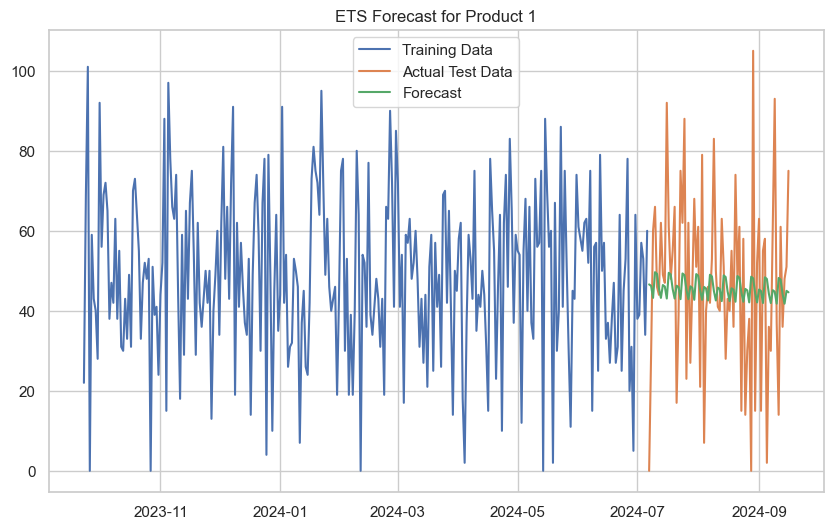

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


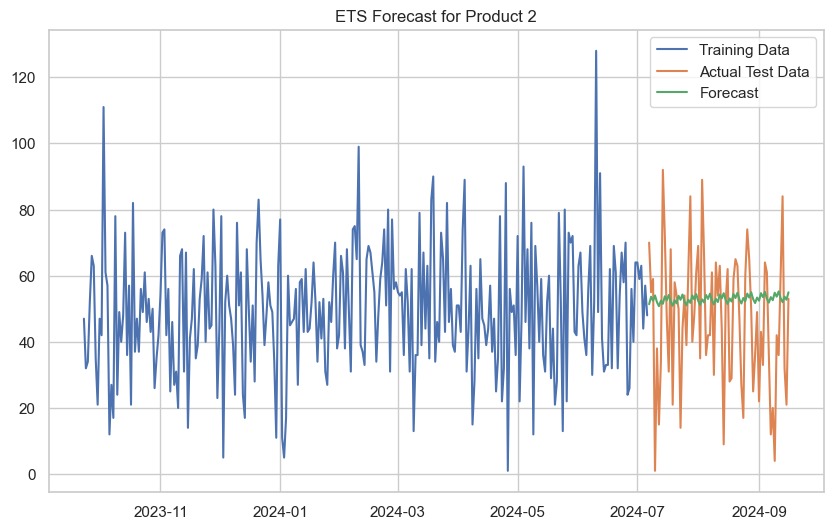

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


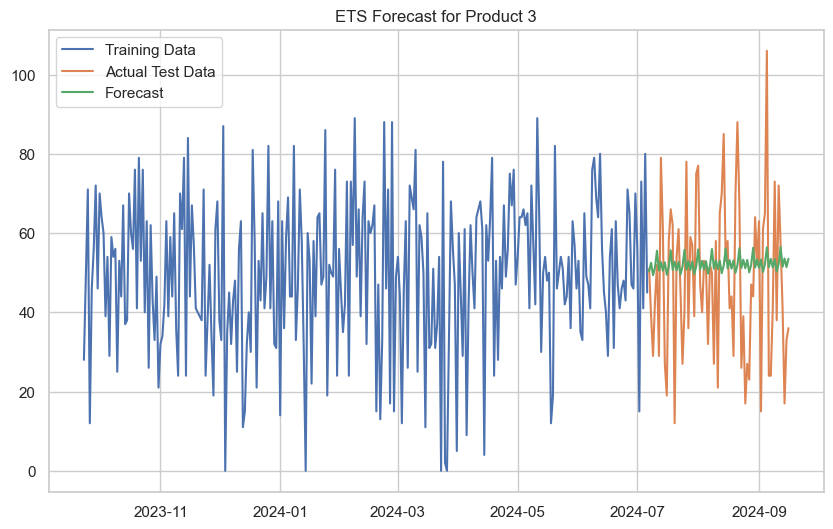

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


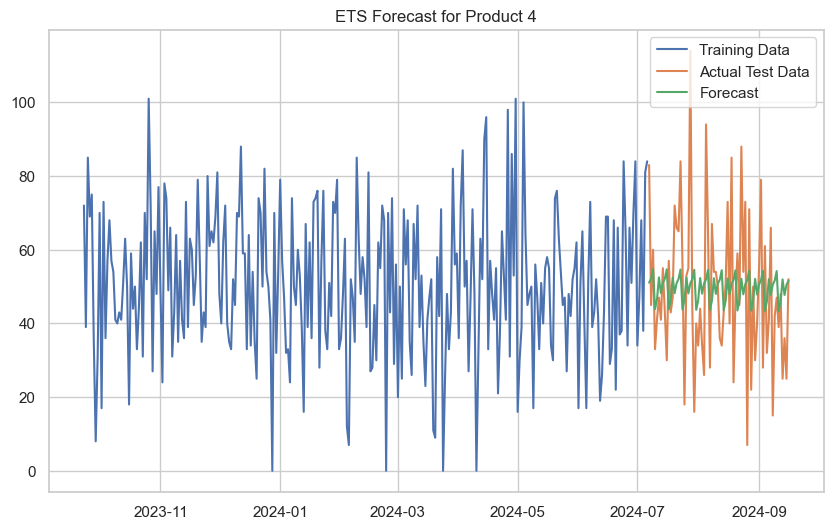

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


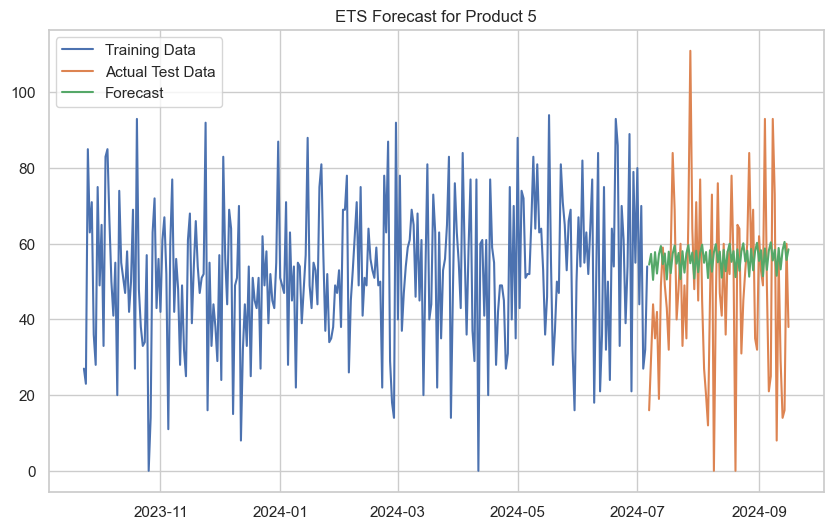

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


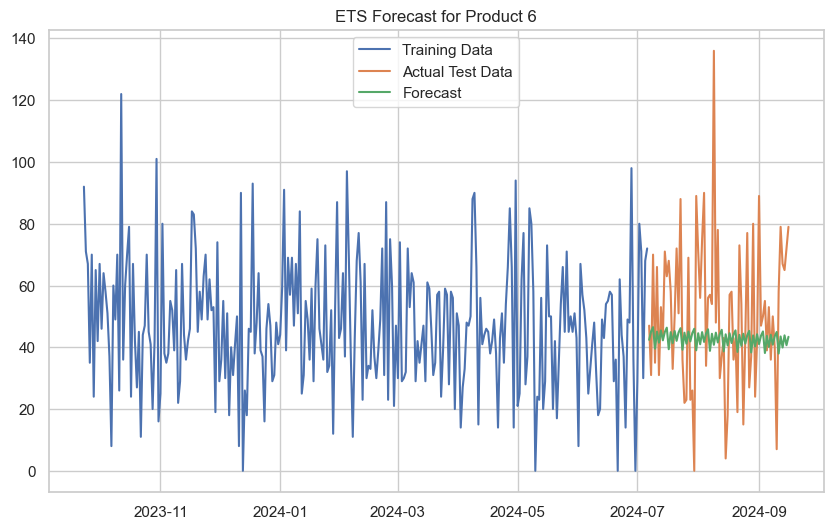

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


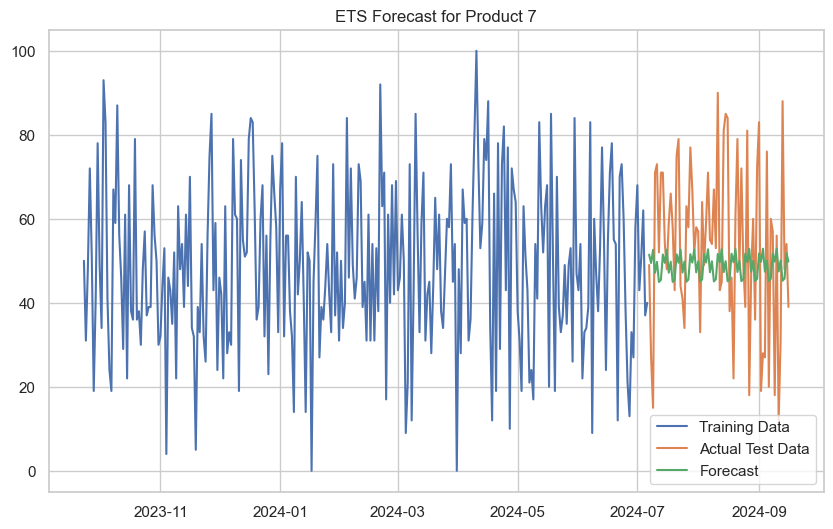

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


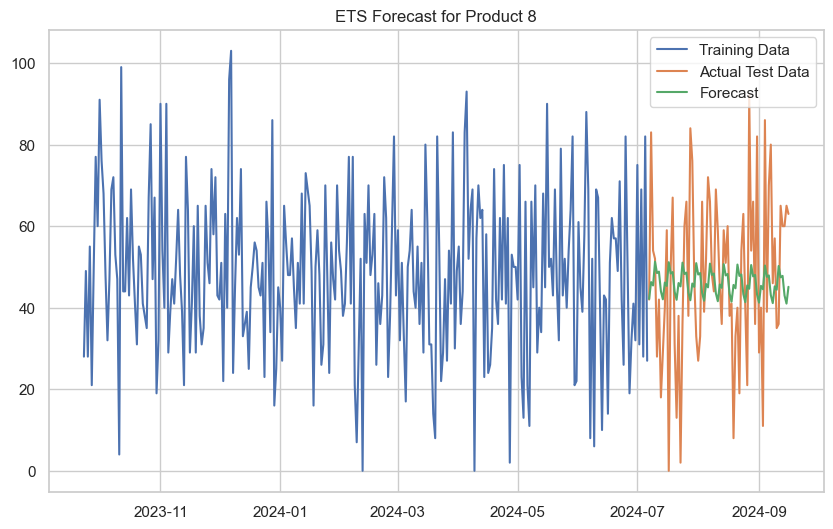

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


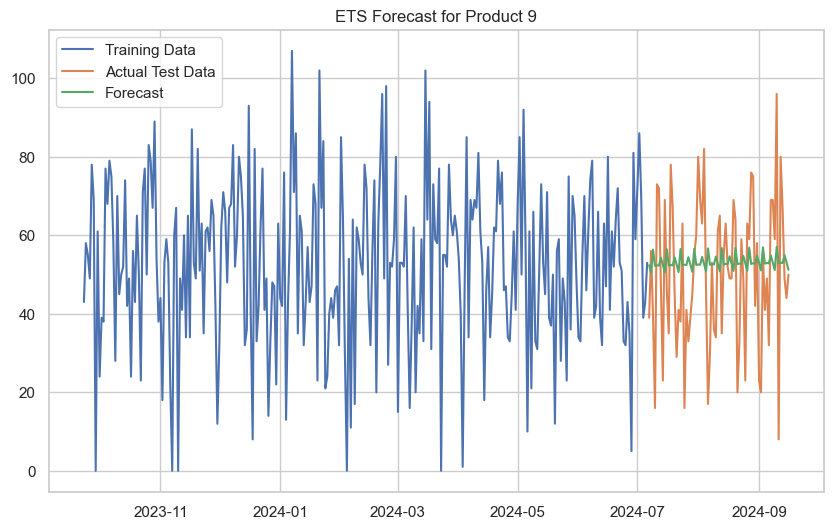

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


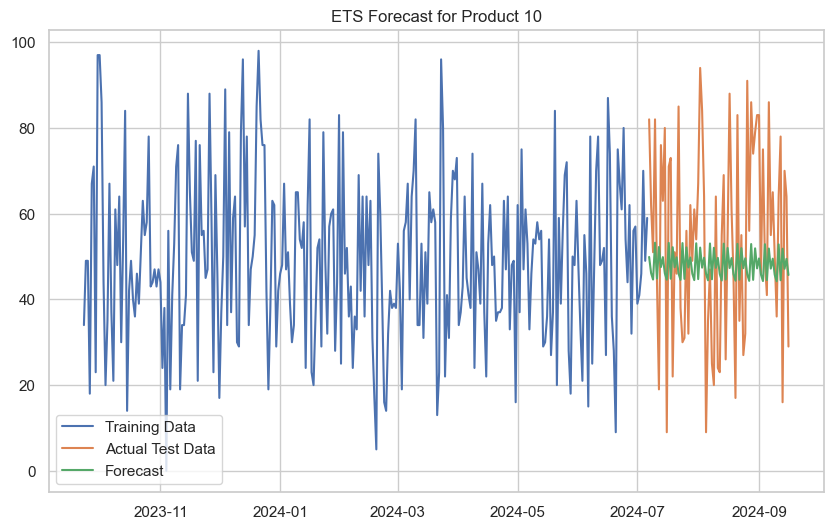

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


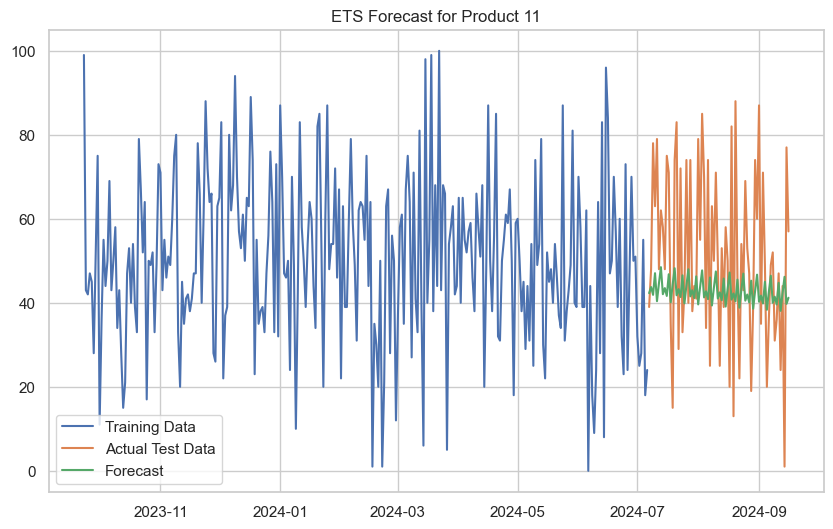

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


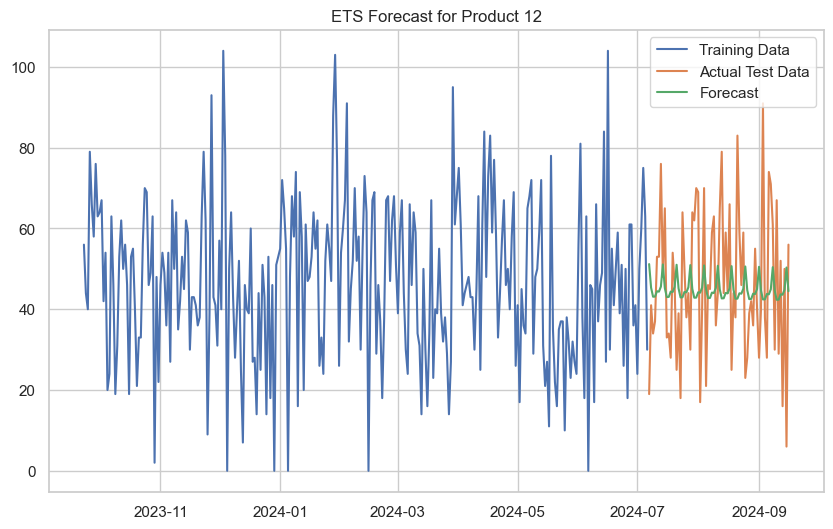

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


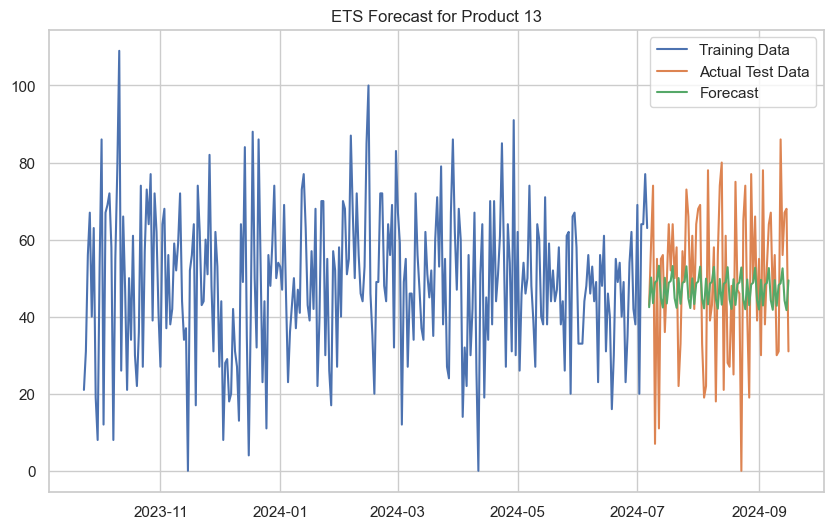

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


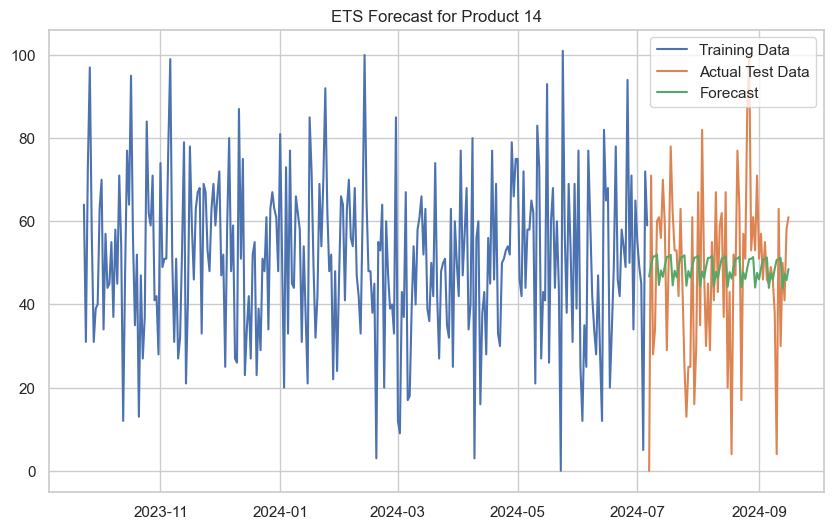

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


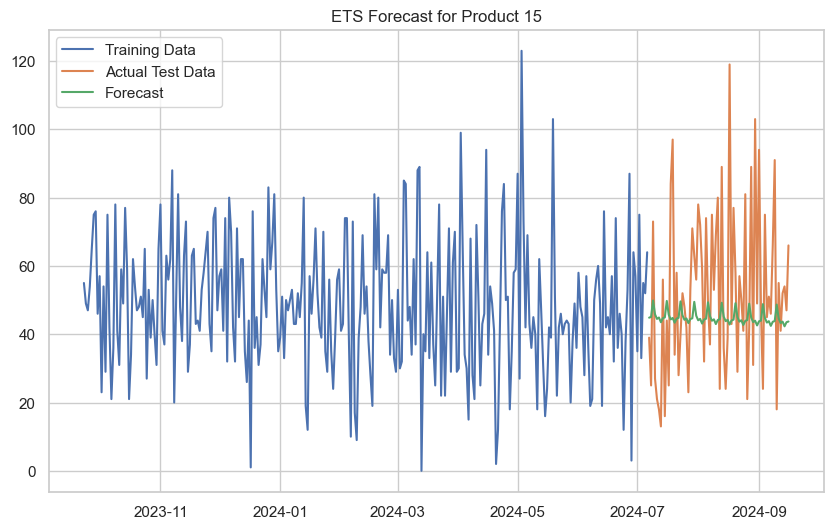

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


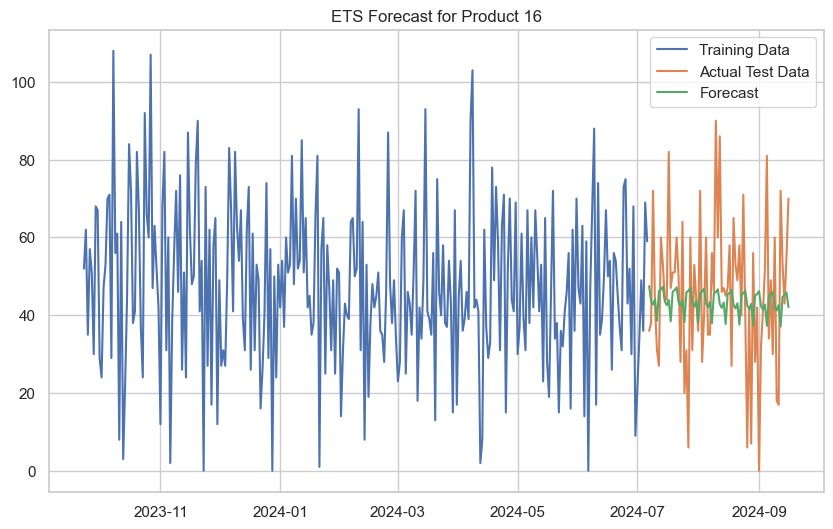

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


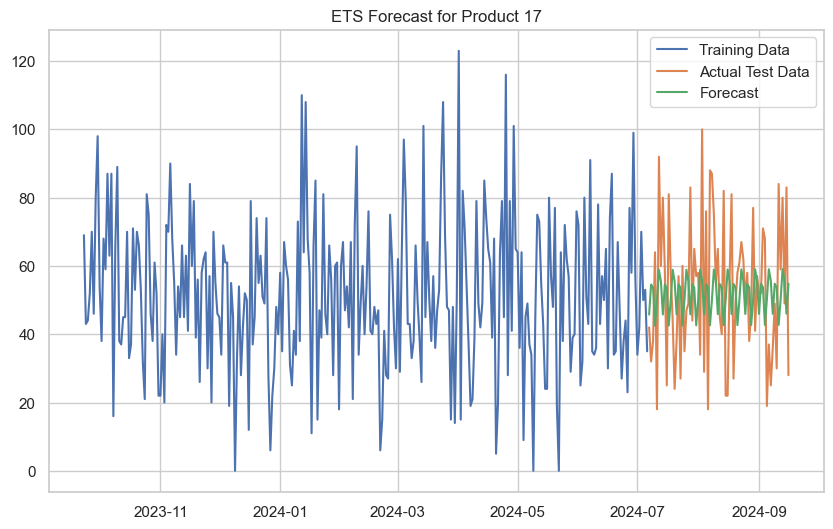

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


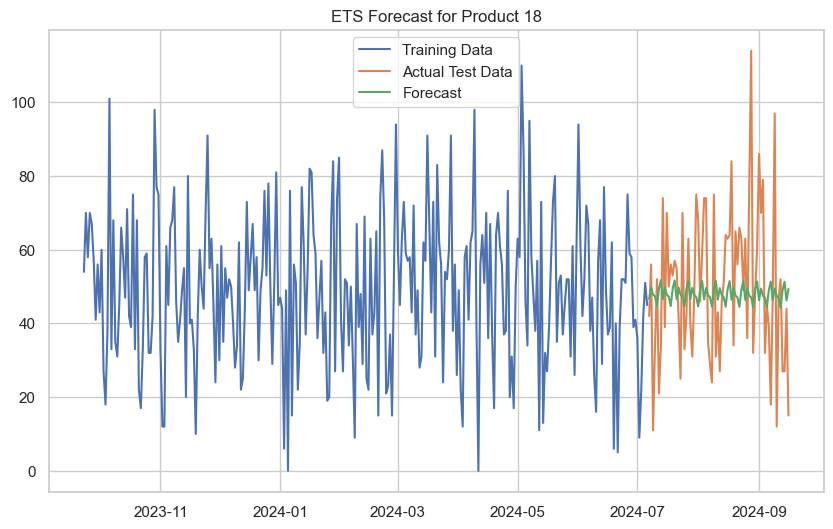

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


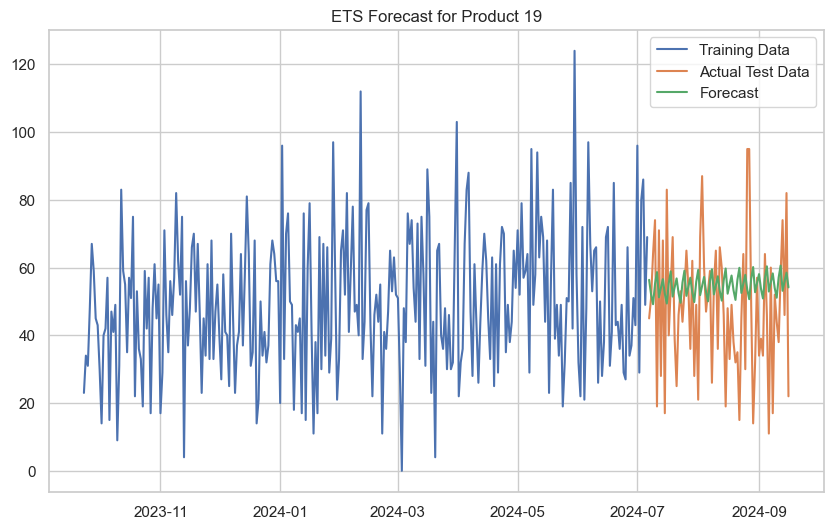

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


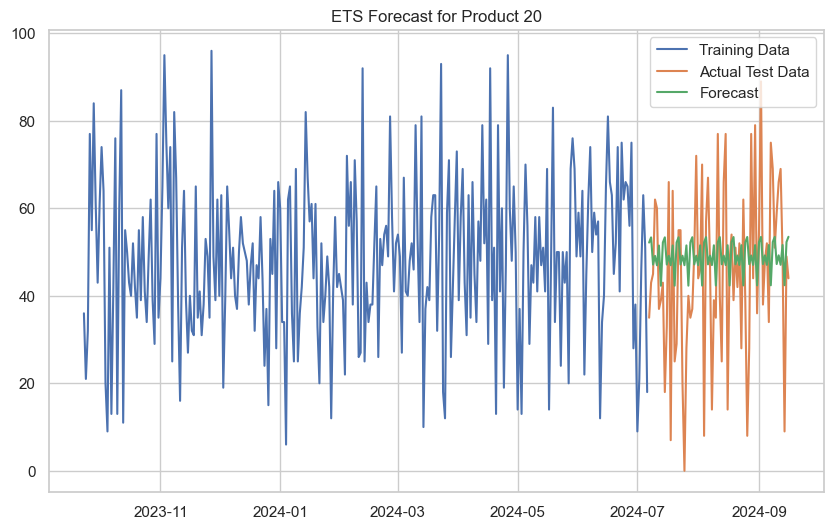

Product ID: 1
RMSE: 22.72214660199145
MAE: 17.626847998869703
MAPE: 82.51518953160915%

Product ID: 2
RMSE: 21.362064656891967
MAE: 17.240312021080165
MAPE: 146.5709040457268%

Product ID: 3
RMSE: 19.66706315628596
MAE: 16.27134852109583
MAPE: 49.79524189393733%

Product ID: 4
RMSE: 19.783082639256854
MAE: 15.45474615976855
MAPE: 46.958569157213525%

Product ID: 5
RMSE: 23.550438596843048
MAE: 18.572574764848092
MAPE: 60.325118962689636%

Product ID: 6
RMSE: 25.21255888028416
MAE: 19.67631801927266
MAPE: 58.07687245534383%

Product ID: 7
RMSE: 20.439979502865004
MAE: 16.87987216857681
MAPE: 42.14198315524036%

Product ID: 8
RMSE: 20.54508106438487
MAE: 16.359314368150628
MAPE: 74.02385457736546%

Product ID: 9
RMSE: 18.956445595242712
MAE: 15.699088000012953
MAPE: 49.731300875030215%

Product ID: 10
RMSE: 23.02190557922474
MAE: 19.42106101196963
MAPE: 51.92516654010401%

Product ID: 11
RMSE: 22.39204628894302
MAE: 18.01486117903353
MAPE: 100.59681078146714%

Product ID: 12
RMSE: 18.706

In [61]:
# Product Sales

forecast_folder = 'product_forecasts'
if not os.path.exists(forecast_folder):
    os.makedirs(forecast_folder)

product_metrics = {}


for product_id in product_sales['product_id'].unique():
    prod_sales = product_sales[product_sales['product_id'] == product_id].set_index('date')
    
    train_size = int(len(prod_sales) * 0.8)
    train_data, test_data = prod_sales[0:train_size], prod_sales[train_size:len(prod_sales)]
    
    # Fit ETS model
    ets_product = ExponentialSmoothing(train_data['sales'], trend='add', seasonal='add', seasonal_periods=7).fit()
    
    # Generating forecast
    forecast = ets_product.forecast(steps=len(test_data))
    
    # Evaluating model performance
    rmse = np.sqrt(mean_squared_error(test_data['sales'], forecast))
    mae = mean_absolute_error(test_data['sales'], forecast)
    # Handling zero actual sales values for MAPE calculation
    mask = test_data['sales'] != 0
    mape = np.mean(np.abs((test_data['sales'][mask] - forecast[mask]) / test_data['sales'][mask])) * 100
    if np.isinf(mape):  # Check for infinity
        mape = np.nan  # Replace with NaN (Not a Number)
    

    product_metrics[product_id] = {'RMSE': rmse, 'MAE': mae, 'MAPE': mape}
    
    plt.figure(figsize=(10,6))
    plt.plot(train_data.index, train_data['sales'], label='Training Data')
    plt.plot(test_data.index, test_data['sales'], label='Actual Test Data')
    plt.plot(test_data.index, forecast, label='Forecast')
    plt.title(f'ETS Forecast for Product {product_id}')
    plt.legend()
    
    plt.savefig(f'{forecast_folder}/product_{product_id}_forecast.png', bbox_inches='tight', dpi=300)
    plt.show()
    
    product_forecasts[product_id] = ets_product.forecast(steps=30)

for product_id, metrics in product_metrics.items():
    print(f"Product ID: {product_id}")
    print(f"RMSE: {metrics['RMSE']}")
    print(f"MAE: {metrics['MAE']}")
    print(f"MAPE: {metrics['MAPE']}%")
    print()

In [47]:
print(product_metrics)

{np.int64(1): {'RMSE': np.float64(22.72214660199145), 'MAE': np.float64(17.626847998869703), 'MAPE': np.float64(inf)}, np.int64(2): {'RMSE': np.float64(21.362064656891967), 'MAE': np.float64(17.240312021080165), 'MAPE': np.float64(146.5709040457268)}, np.int64(3): {'RMSE': np.float64(19.66706315628596), 'MAE': np.float64(16.27134852109583), 'MAPE': np.float64(49.79524189393733)}, np.int64(4): {'RMSE': np.float64(19.783082639256854), 'MAE': np.float64(15.45474615976855), 'MAPE': np.float64(46.958569157213525)}, np.int64(5): {'RMSE': np.float64(23.550438596843048), 'MAE': np.float64(18.572574764848092), 'MAPE': np.float64(inf)}, np.int64(6): {'RMSE': np.float64(25.21255888028416), 'MAE': np.float64(19.67631801927266), 'MAPE': np.float64(inf)}, np.int64(7): {'RMSE': np.float64(20.439979502865004), 'MAE': np.float64(16.87987216857681), 'MAPE': np.float64(42.14198315524036)}, np.int64(8): {'RMSE': np.float64(20.54508106438487), 'MAE': np.float64(16.359314368150628), 'MAPE': np.float64(inf)}

Evaluating ARIMA for category sales forecasting

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)


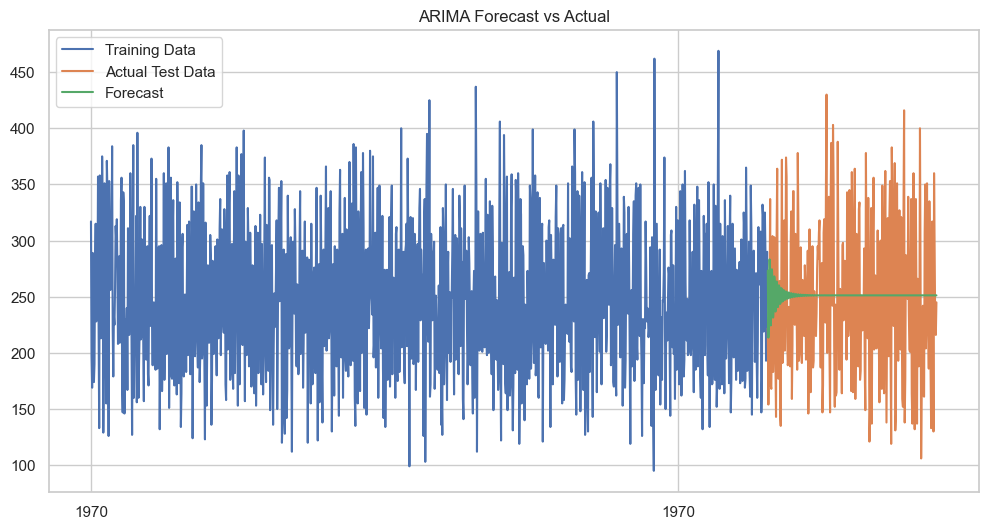

Root Mean Squared Error: 67.49305396203532
Mean Absolute Error: 56.57669673701473
Mean Absolute Percentage Error: 0.2578002019706919


In [56]:
category_data = category_sales['sales']
train, test = train_test_split(category_data, test_size=0.2, shuffle=False)

# Fit ARIMA model
model = ARIMA(train, order=(5,1,0))
fitted = model.fit()

# Forecast
forecast = fitted.forecast(steps=len(test))

# Plot the results
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Test Data')
plt.plot(test.index, forecast, label='Forecast')
plt.title('ARIMA Forecast vs Actual')
plt.legend()
plt.savefig('arima_forecast.png')
plt.show()

# Calculate metrics
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
mape = np.mean(np.abs((test - forecast) / test))

print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error: {mape}')